# A deeper dive into RF classifiers

## To understand a random forest, you must first understand *Decision Trees*

A decision tree makes classifications by splitting data based on feature values, creating a tree-like structure of if-then rules. Here's how it works:

1. *Starting at the Root*  
The algorithm first looks at all features and finds the one that best separates the classes. For example, if classifying animals, the first split might be "Does it have fur?"

2. *Measuring Split Quality*  
To determine the best split, the algorithm uses metrics like:
- Gini impurity: Measures how often a random element would be incorrectly labeled
- Information gain: Measures how much uncertainty is reduced by the split
- Entropy: Measures the disorder or randomness in the data

3. *Creating Binary Splits*  
Each node splits the data into two groups based on a feature value. For numerical features, it finds a threshold (e.g., "Is height > 5.5 feet?"). For categorical features, it creates groups (e.g., "Is color red or blue?").

4. *Recursive Splitting*  
The process repeats for each new group, creating child nodes until reaching a stopping condition:
- Pure leaf node (all samples belong to one class)
- Maximum depth reached
- Too few samples to split
- No improvement in classification

5. *Making Predictions*  
To classify a new sample:
- Start at the root node
- Follow the appropriate path based on the sample's features
- Return the majority class at the leaf node reached

**Simple example:**
```
                    Has fur?
                   /        \
                Yes          No
               /             \
        Has claws?         Has scales?
         /      \           /      \
       Yes      No        Yes      No
       /         \         |        \
     Cat        Dog     Lizard     Bird
```

*Common challenges:*
- Can overfit if grown too deep
- Sensitive to small changes in training data
- May struggle with diagonal decision boundaries
- Binary splits may not handle all relationships efficiently

The tree's interpretability is one of its main advantages - you can follow the path and understand exactly why a particular classification was made. This makes it popular in areas where decision transparency is important.

## How "Split Quality" is measured:  
The key idea is to find splits that create the "purest" possible groups - meaning each group contains mostly samples from the same class. Main metrics:

1. *Gini Impurity*  
- Measures the probability of incorrect classification if a random label was assigned according to the class distribution
- Formula: Gini = 1 - Σ(pi²), where pi is the proportion of class i in the node
- Example with binary classification:
  ```python
  # Node with 7 cats, 3 dogs
  p_cat = 7/10 = 0.7
  p_dog = 3/10 = 0.3
  Gini = 1 - (0.7² + 0.3²)
  Gini = 1 - (0.49 + 0.09)
  Gini = 0.42  # Lower is better
  ```

2. *Entropy*  
- Measures the average amount of information contained in the node
- Formula: Entropy = -Σ(pi * log2(pi))
- Using the same example:
  ```python
  # Node with 7 cats, 3 dogs
  p_cat = 7/10 = 0.7
  p_dog = 3/10 = 0.3
  Entropy = -(0.7 * log2(0.7) + 0.3 * log2(0.3))
  Entropy = 0.88  # Lower is better
  ```

3. *Information Gain*  
- Measures how much a split improves the purity
- Formula: IG = Parent_Impurity - Weighted_Average(Child_Impurities)
- Example:
  ```python
  # Parent: 7 cats, 3 dogs (Gini = 0.42)
  # Split creates:
  #   Left child: 6 cats, 1 dog
  #   Right child: 1 cat, 2 dogs
  
  # Left child Gini
  p_cat_left = 6/7
  p_dog_left = 1/7
  Gini_left = 1 - ((6/7)² + (1/7)²) = 0.24
  
  # Right child Gini
  p_cat_right = 1/3
  p_dog_right = 2/3
  Gini_right = 1 - ((1/3)² + (2/3)²) = 0.44
  
  # Weight by proportion of samples
  weighted_children_gini = (7/10 * 0.24) + (3/10 * 0.44) = 0.30
  
  # Information gain
  gain = 0.42 - 0.30 = 0.12  # Higher is better
  ```
  *Note that the "Parent_Impurity" can be calculated with either Gini Impurity or Entropy

When evaluating a potential split, the algorithm:
1. Calculates the impurity of the parent node
2. Calculates the impurity of each child node after the split
3. Computes the weighted average of child impurities
4. Subtracts this from the parent impurity to get the information gain
5. Chooses the split that gives the highest information gain

The tree-building algorithm tries different features and split points, calculating the information gain for each, and selects the one that gives the best improvement in purity.

This process helps ensure that each split makes meaningful progress toward separating the classes, rather than creating arbitrary divisions in the data.


# Random Forest
A random forest is an ensemble learning method that creates multiple decision trees and combines their predictions. Here's how it works:

1. *Creating Multiple Trees*  
Each tree in the forest is built using a random subset of the training data, selected through a process called "bagging" (bootstrap aggregating). Some data points may be selected multiple times, while others may not be selected at all.

2. *Feature Randomization*   
When building each tree, at every split point, only a random subset of features is considered. For example, if you have 100 features, each split might only consider 10 random features. This feature randomization helps create diverse trees.

3. *Decision Tree Building*  
Each tree is grown to its maximum depth, with splits chosen to best separate the classes using metrics like Gini impurity or information gain. Since each tree sees different data and features, they learn different patterns.

4. *Making Predictions*  
When classifying a new data point:
- Each tree in the forest makes its own prediction
- The forest takes a "vote" across all trees
- The most common prediction becomes the final classification

**Key advantages:**
- Reduces overfitting through averaging multiple trees
- Handles high-dimensional data well
- Provides feature importance measurements
- Maintains good accuracy even with missing data
- Naturally handles both numerical and categorical features

For example, in a terrain classification system, each tree might look at different combinations of surface datasets and map units to make a prediction, and the final label for the surface would be based on the consensus across all trees.

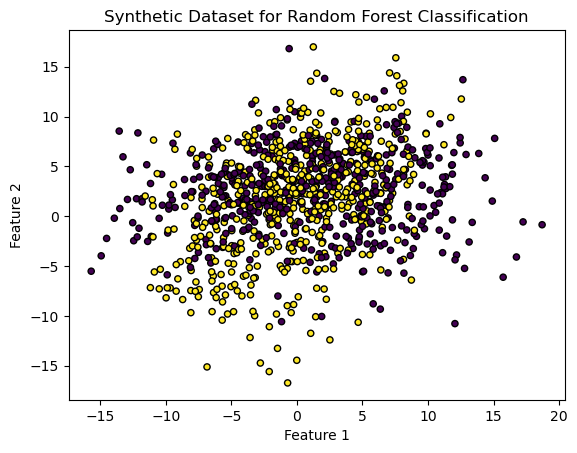

In [1]:
from sklearn.datasets import make_classification

import matplotlib.pyplot as plt

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, n_classes=2, random_state=42)

# Plot the first two features for visualization
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=20)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Dataset for Random Forest Classification')
plt.show()

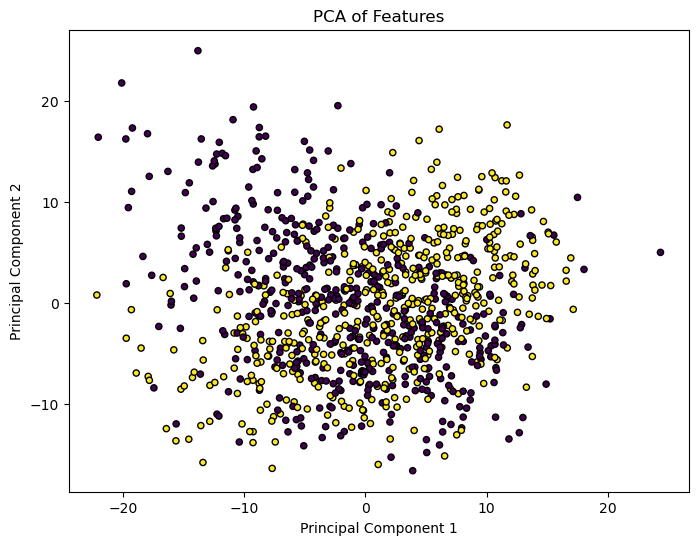

In [5]:
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

# Perform PCA
pca = PCA(n_components=2)  # You can change the number of components as needed
X_pca = pca.fit_transform(X)

# Plot the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Features')
plt.show()

Accuracy: 0.8700
              precision    recall  f1-score   support

           0       0.88      0.87      0.87        52
           1       0.86      0.88      0.87        48

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100



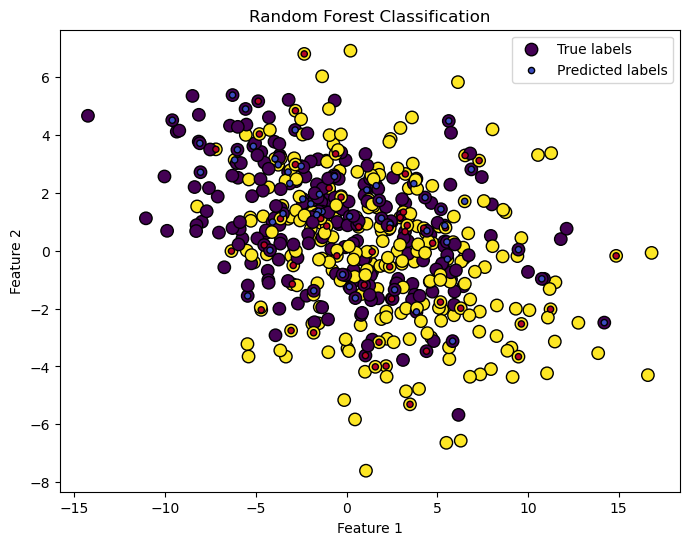

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Generate synthetic classification data
X, y = make_classification(n_samples=500, n_features=20, n_informative=15, n_redundant=5, n_classes=2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
'''
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.
    Note: This parameter is tree-specific.
'''

# make a train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
rf_classifier.fit(X_train, y_train)

# Predict the labels
y_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print(classification_report(y_test, y_pred_rf))

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=80, label="True labels")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_rf, cmap='coolwarm', edgecolor='k', s=20, marker='o', label="Predicted labels")
plt.title("Random Forest Classification")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()